This script contains the following points:
1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.
2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.
3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
a) Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
b) Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)
4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.
5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)
6. Create an appropriate visualization to show the distribution of profiles.
7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.
9. Produce suitable charts to illustrate your results and export them in your project folder.
10. Tidy up your script, export your final data set, and save your notebook.

In [1]:
#import libraries 

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [2]:
# import pickle file of ords_prods_merge_customers_part_2
import pandas as pd

path = r'E:\Instacart Basket Analysis'
orders_product_all= pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_merge_customers_part_2.pkl'))

In [3]:
orders_product_all.columns

Index(['Unnamed: 0', 'order_id', 'user_id', 'eval_set', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'product_id', 'add_to_cart_order', 'reordered', '_merge',
       'product_name', 'aisle_id', 'department_id', 'prices', 'merge_flag',
       'busiest day', 'busiest_day', 'busiest_days', 'busiest_period_of_day',
       'max_order', 'loyalty_flag', 'average_spend', 'spender_flag',
       'customer_frequency', 'frequency_flag', 'gender', 'state', 'age',
       'date_joined', 'n_dependants', 'family_status', 'income',
       'merge_flag_2'],
      dtype='object')

In [4]:
orders_product_all.info

<bound method DataFrame.info of          Unnamed: 0  order_id  user_id eval_set  order_number  \
0                 0   2539329        1    prior             1   
1                 1   2398795        1    prior             2   
2                 2    473747        1    prior             3   
3                 3   2254736        1    prior             4   
4                 4    431534        1    prior             5   
...             ...       ...      ...      ...           ...   
9918248     9815365   2376815    11534    prior            11   
9918249     9815366    774135    11534    prior            12   
9918250     9819705   3320476    38979    prior             1   
9918251     9819706   2054093    38979    prior             2   
9918252     9819707   3292079    38979    prior             3   

         orders_day_of_week  order_hour_of_day  days_since_prior_order  \
0                         2                  8               11.114836   
1                         3            

In [5]:
orders_product_all=orders_product_all.drop(columns =['eval_set','busiest day'])

Citation: “The Instacart Online Grocery Shopping
Dataset 2017”, Accessed from www.instacart.com/datasets/grocery-shopping-2017
via Kaggle on <date>.

# 3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
# a) Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions). b) Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [6]:
# Create region list
result= []

for state in orders_product_all["state"]:
    if state in ('Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey'):
        result.append("Northeast")
    elif state in ('Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri'):
        result.append("Midwest")
    elif state in ('Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'):
        result.append("South")
    else:
        result.append("West")

In [7]:
orders_product_all['Region'] = result

In [8]:
pd.options.display.max_columns = None

In [9]:
orders_product_all.head()

,Unnamed: 0,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,merge_flag,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,customer_frequency,frequency_flag,gender,state,age,date_joined,n_dependants,family_status,income,merge_flag_2,Region
0,0,2539329,1,1,2,8,11.114836,196,1,0,both,Soda,77,7,9.0,both,Regularly busy,Regularly busy,Most orders,10,New customer,6.367797,Low_spender,20.0,Regular customer.,Female,Alabama,31,2/17/2019,3,married,40423,both,South
1,1,2398795,1,2,3,7,15.000000,196,1,1,both,Soda,77,7,9.0,both,Regularly busy,Regularly busy,Fewest orders,10,New customer,6.367797,Low_spender,20.0,Regular customer.,Female,Alabama,31,2/17/2019,3,married,40423,both,South
2,2,473747,1,3,3,12,21.000000,196,1,1,both,Soda,77,7,9.0,both,Regularly busy,Regularly busy,Most orders,10,New customer,6.367797,Low_spender,20.0,Regular customer.,Female,Alabama,31,2/17/2019,3,married,40423,both,South
3,3,2254736,1,4,4,7,29.000000,196,1,1,both,Soda,77,7,9.0,both,Least busy,Least busy,Fewest orders,10,New customer,6.367797,Low_spender,20.0,Regular customer.,Female,Alabama,31,2/17/2019,3,married,40423,both,South
4,4,431534,1,5,4,15,28.000000,196,1,1,both,Soda,77,7,9.0,both,Least busy,Least busy,Most orders,10,New customer,6.367797,Low_spender,20.0,Regular customer.,Female,Alabama,31,2/17/2019,3,married,40423,both,South


In [10]:
#Analyze spending habits across different U.S. regions
crosstab=pd.crosstab(orders_product_all['Region'],orders_product_all['spender_flag'], dropna=False )

In [11]:
crosstab.to_clipboard()

In [12]:
crosstab

spender_flag,High_spender,Low_spender
Region,,
Midwest,39264,2272857
Northeast,31365,1738495
South,64712,3260329
West,46577,2464654


# 4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [13]:
# creat an exclusion flag
orders_product_all.loc[(orders_product_all['max_order'] < 5), 'activity_flag'] = 'Low Activity'

In [14]:
orders_product_all.loc[(orders_product_all['max_order'] >= 5), 'activity_flag'] = 'Regular Activity'

In [15]:
orders_product_all['activity_flag'].value_counts(dropna=False)

activity_flag
Regular Activity    9479702
Low Activity         438551
Name: count, dtype: int64

In [16]:
#exclude low activity from the data list
orders_product_all_ex=orders_product_all[orders_product_all['activity_flag'].isin(['Regular Activity'])]

In [17]:
orders_product_all_ex['activity_flag'].value_counts(dropna = False)

activity_flag
Regular Activity    9479702
Name: count, dtype: int64

# 5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [18]:
orders_product_all_ex[['age', 'income', 'department_id', 'n_dependants']].describe()

,age,income,department_id,n_dependants
count,9.479702e+06,9.479702e+06,9.479702e+06,9.479702e+06
mean,4.944047e+01,9.939696e+04,9.927230e+00,1.505185e+00
std,1.847984e+01,4.385358e+04,6.282441e+00,1.116109e+00
min,1.800000e+01,2.602400e+04,1.000000e+00,0.000000e+00
25%,3.300000e+01,6.672800e+04,4.000000e+00,1.000000e+00
50%,4.900000e+01,9.643800e+04,9.000000e+00,2.000000e+00
75%,6.500000e+01,1.275370e+05,1.600000e+01,3.000000e+00
max,8.100000e+01,5.939010e+05,2.100000e+01,3.000000e+00


In [19]:
#identify top departments
orders_product_all_ex['department_id'].value_counts(dropna = False)

department_id
4     2782541
16    1582522
19     848159
7      787010
1      645284
13     544799
3      343648
15     311497
20     309820
9      250829
17     214833
12     206882
14     205129
11     131476
18     124653
6       78663
5       43482
8       28159
21      19670
2       10386
10      10260
Name: count, dtype: int64

In [20]:
# create parent list
results = []

for value in orders_product_all_ex['n_dependants']:
    if value == 0:
        results.append("Non Parent")
    else:
        results.append("Parent")

In [21]:
orders_product_all_ex['parental_status']= results

C:\Users\negar\AppData\Local\Temp\ipykernel_2268\646100709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_product_all_ex['parental_status']= results


In [22]:
orders_product_all_ex['parental_status'].value_counts(dropna=False)

parental_status
Parent        7139228
Non Parent    2340474
Name: count, dtype: int64

In [23]:
orders_product_all_ex.columns

Index(['Unnamed: 0', 'order_id', 'user_id', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'product_id', 'add_to_cart_order', 'reordered', '_merge',
       'product_name', 'aisle_id', 'department_id', 'prices', 'merge_flag',
       'busiest_day', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'average_spend', 'spender_flag', 'customer_frequency',
       'frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'family_status', 'income', 'merge_flag_2', 'Region',
       'activity_flag', 'parental_status'],
      dtype='object')

In [24]:
orders_product_all_ex.head()

,Unnamed: 0,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,merge_flag,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,customer_frequency,frequency_flag,gender,state,age,date_joined,n_dependants,family_status,income,merge_flag_2,Region,activity_flag,parental_status
0,0,2539329,1,1,2,8,11.114836,196,1,0,both,Soda,77,7,9.0,both,Regularly busy,Regularly busy,Most orders,10,New customer,6.367797,Low_spender,20.0,Regular customer.,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Regular Activity,Parent
1,1,2398795,1,2,3,7,15.000000,196,1,1,both,Soda,77,7,9.0,both,Regularly busy,Regularly busy,Fewest orders,10,New customer,6.367797,Low_spender,20.0,Regular customer.,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Regular Activity,Parent
2,2,473747,1,3,3,12,21.000000,196,1,1,both,Soda,77,7,9.0,both,Regularly busy,Regularly busy,Most orders,10,New customer,6.367797,Low_spender,20.0,Regular customer.,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Regular Activity,Parent
3,3,2254736,1,4,4,7,29.000000,196,1,1,both,Soda,77,7,9.0,both,Least busy,Least busy,Fewest orders,10,New customer,6.367797,Low_spender,20.0,Regular customer.,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Regular Activity,Parent
4,4,431534,1,5,4,15,28.000000,196,1,1,both,Soda,77,7,9.0,both,Least busy,Least busy,Most orders,10,New customer,6.367797,Low_spender,20.0,Regular customer.,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Regular Activity,Parent


In [25]:
orders_product_all_ex.head()

,Unnamed: 0,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,merge_flag,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,customer_frequency,frequency_flag,gender,state,age,date_joined,n_dependants,family_status,income,merge_flag_2,Region,activity_flag,parental_status
0,0,2539329,1,1,2,8,11.114836,196,1,0,both,Soda,77,7,9.0,both,Regularly busy,Regularly busy,Most orders,10,New customer,6.367797,Low_spender,20.0,Regular customer.,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Regular Activity,Parent
1,1,2398795,1,2,3,7,15.000000,196,1,1,both,Soda,77,7,9.0,both,Regularly busy,Regularly busy,Fewest orders,10,New customer,6.367797,Low_spender,20.0,Regular customer.,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Regular Activity,Parent
2,2,473747,1,3,3,12,21.000000,196,1,1,both,Soda,77,7,9.0,both,Regularly busy,Regularly busy,Most orders,10,New customer,6.367797,Low_spender,20.0,Regular customer.,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Regular Activity,Parent
3,3,2254736,1,4,4,7,29.000000,196,1,1,both,Soda,77,7,9.0,both,Least busy,Least busy,Fewest orders,10,New customer,6.367797,Low_spender,20.0,Regular customer.,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Regular Activity,Parent
4,4,431534,1,5,4,15,28.000000,196,1,1,both,Soda,77,7,9.0,both,Least busy,Least busy,Most orders,10,New customer,6.367797,Low_spender,20.0,Regular customer.,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Regular Activity,Parent


In [26]:
# Create income list
income = []

for value in orders_product_all_ex["income"]:
    if value < 75000:
        income.append("Low Income")
    elif value >= 75000 and value < 150000:
        income.append("Medium Income")
    else:
        income.append("High Income")

In [27]:
orders_product_all_ex['income_status'] = income

C:\Users\negar\AppData\Local\Temp\ipykernel_2268\2043733402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_product_all_ex['income_status'] = income


In [28]:
orders_product_all_ex['income_status'].value_counts(dropna=False)

income_status
Medium Income    5207228
Low Income       3070684
High Income      1201790
Name: count, dtype: int64

In [29]:
# create young adult flag\n",
orders_product_all_ex.loc[orders_product_all_ex['age'].between(18,39), 'age_group'] = 'Young Adult'

C:\Users\negar\AppData\Local\Temp\ipykernel_2268\516539185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_product_all_ex.loc[orders_product_all_ex['age'].between(18,39), 'age_group'] = 'Young Adult'


In [30]:
# create middle-aged adult flag
orders_product_all_ex.loc[orders_product_all_ex['age'].between(40,64), 'age_group'] = 'Middle Aged Adult'

In [31]:
# create senior citizen flag
orders_product_all_ex.loc[orders_product_all_ex['age'] >= 65, 'age_group'] = 'Senior Citizen'

In [32]:
orders_product_all_ex['age_group'].value_counts(dropna=False)

age_group
Middle Aged Adult    3692752
Young Adult          3279794
Senior Citizen       2507156
Name: count, dtype: int64

In [33]:
# create single young adult flag
orders_product_all_ex.loc[(orders_product_all_ex['age_group'] == 'Young Adult') & (orders_product_all_ex['parental_status'] == 'Non Parent'),  'customer_profile'] = 'Single Young Adult'

C:\Users\negar\AppData\Local\Temp\ipykernel_2268\3053446053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_product_all_ex.loc[(orders_product_all_ex['age_group'] == 'Young Adult') & (orders_product_all_ex['parental_status'] == 'Non Parent'),  'customer_profile'] = 'Single Young Adult'


In [34]:
# create young adult parent flag
orders_product_all_ex.loc[(orders_product_all_ex['age_group'] == 'Young Adult') & (orders_product_all_ex['parental_status'] == 'Parent'),'customer_profile'] = 'Young Adult Parent'

In [35]:
# create middle-aged single adult flag
orders_product_all_ex.loc[(orders_product_all_ex['age_group'] == 'Middle Aged Adult') & (orders_product_all_ex['parental_status'] == 'Non Parent'),'customer_profile'] = 'Middle-Aged Single Adult'

In [36]:
# create middle-aged single adult flag
orders_product_all_ex.loc[(orders_product_all_ex['age_group'] == 'Middle Aged Adult') & (orders_product_all_ex['parental_status'] == 'Parent'),'customer_profile'] = 'Middle-Aged Parent'

In [37]:
# create middle-aged single adult flag
orders_product_all_ex.loc[(orders_product_all_ex['age_group'] == 'Senior Citizen') & (orders_product_all_ex['parental_status'] == 'Non Parent'),'customer_profile'] = 'Single Senior Citizen'

In [38]:
# create middle-aged single adult flag
orders_product_all_ex.loc[(orders_product_all_ex['age_group'] == 'Senior Citizen') & (orders_product_all_ex['parental_status'] == 'Parent'),'customer_profile'] = 'Senior Citizen Parent'

In [39]:
orders_product_all_ex['customer_profile'].value_counts(dropna=False)

customer_profile
Middle-Aged Parent          2761515
Young Adult Parent          2480335
Senior Citizen Parent       1897378
Middle-Aged Single Adult     931237
Single Young Adult           799459
Single Senior Citizen        609778
Name: count, dtype: int64

In [40]:
# crosstab customer_profile and income_status
crosstab_1=pd.crosstab(orders_product_all_ex['customer_profile'],orders_product_all_ex['income_status'], dropna=False )

In [41]:
crosstab_1.to_clipboard()

In [42]:
crosstab_1

income_status,High Income,Low Income,Medium Income
customer_profile,,,
Middle-Aged Parent,521500,481990,1758025
Middle-Aged Single Adult,178451,152520,600266
Senior Citizen Parent,362540,292745,1242093
Single Senior Citizen,113119,90722,405937
Single Young Adult,6298,502312,290849
Young Adult Parent,19882,1550395,910058


In [43]:
#crosstab department_id and age_group
crosstab_2=pd.crosstab(orders_product_all_ex['department_id'],orders_product_all_ex['age_group'], dropna=False )
crosstab_2.to_clipboard()
crosstab_2

age_group,Middle Aged Adult,Senior Citizen,Young Adult
department_id,,,
1,247618,174390,223276
2,4032,2605,3749
3,132636,92104,118908
4,1081665,739152,961724
5,16755,10082,16645
6,31047,20431,27185
7,311245,209080,266685
8,10348,7225,10586
9,98159,66147,86523


# 6. Create an appropriate visualization to show the distribution of profiles.

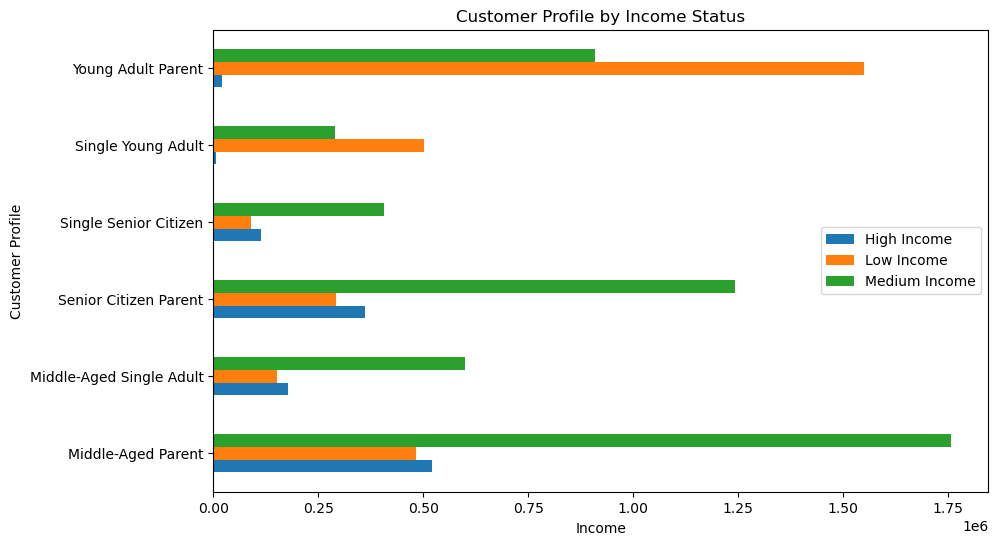

In [44]:
# Create a dictionary to represent the table data
# Create the DataFrame
data = {
    'High Income': [521500, 178451, 362540, 113119, 6298, 19882],
    'Low Income': [481990, 152520, 292745, 90722, 502312, 1550395],
    'Medium Income': [1758025, 600266, 1242093, 405937, 290849, 910058]
}

index = ['Middle-Aged Parent', 'Middle-Aged Single Adult', 'Senior Citizen Parent', 
         'Single Senior Citizen', 'Single Young Adult', 'Young Adult Parent']

df = pd.DataFrame(data, index=index)

# Plot the horizontal bar chart
bar_1=df.plot(kind='barh', figsize=(10, 6))
plt.xlabel('Income')
plt.ylabel('Customer Profile')
plt.title('Customer Profile by Income Status')
plt.show()

In [45]:
#Exporting Bar chart
bar_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_income.png'))

In [46]:
# group region and customer profile columns
orders_product_all_ex.groupby('Region')['customer_profile'].value_counts(dropna = False)

Region     customer_profile        
Midwest    Middle-Aged Parent          634487
           Young Adult Parent          581372
           Senior Citizen Parent       440578
           Middle-Aged Single Adult    229294
           Single Young Adult          185399
           Single Senior Citizen       138903
Northeast  Middle-Aged Parent          500280
           Young Adult Parent          427944
           Senior Citizen Parent       332730
           Middle-Aged Single Adult    157040
           Single Young Adult          141917
           Single Senior Citizen       130302
South      Middle-Aged Parent          900901
           Young Adult Parent          867410
           Senior Citizen Parent       632306
           Middle-Aged Single Adult    314188
           Single Young Adult          273847
           Single Senior Citizen       191065
West       Middle-Aged Parent          725847
           Young Adult Parent          603609
           Senior Citizen Parent       49176

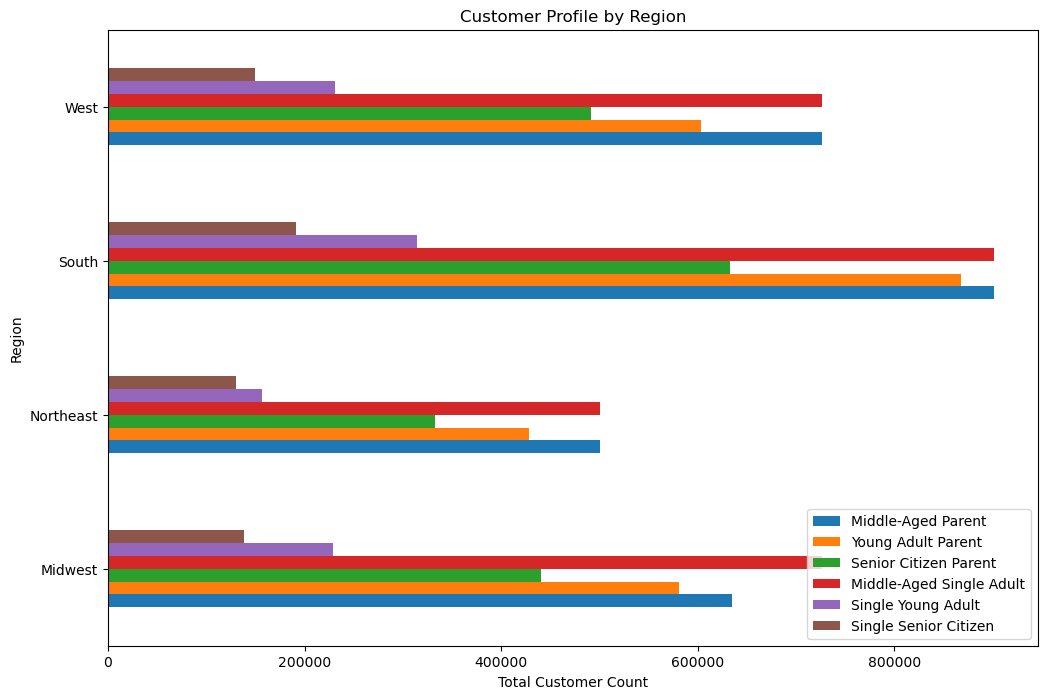

In [47]:
#creat bar chat for customr_profile by Region

# Create the DataFrame
data_2 = {
    'Midwest': [634487, 581372, 440578, 725847, 229294, 138903],
    'Northeast': [500280, 427944, 332730, 500280, 157040, 130302],
    'South': [900901, 867410, 632306, 900901, 314188, 191065],
    'West': [725847, 603609, 491764, 725847, 230715, 149508]
}

index_2 = ['Middle-Aged Parent', 'Young Adult Parent', 'Senior Citizen Parent', 
         'Middle-Aged Single Adult', 'Single Young Adult', 'Single Senior Citizen']

df_2 = pd.DataFrame(data_2, index_2)

# Plot the horizontal bar chart
fig_2, ax_2 = plt.subplots(figsize=(12, 8))

# Transpose the DataFrame for correct labeling
bar_2=df_2.T.plot(kind='barh', ax=ax_2)
plt.xlabel('Total Customer Count')
plt.ylabel('Region')
plt.title('Customer Profile by Region')
plt.show()


In [48]:
#Exporting Bar chart
bar_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_Region.png'))

# 7.Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [49]:
#Aggregate the max, mean, and min variables on a customer-profile level
orders_product_all_ex.groupby('customer_profile').agg({'days_since_prior_order': ['mean','min','max']})

days_since_prior_order           
                                           mean  min   max
customer_profile                                          
Middle-Aged Parent                    10.935976  0.0  30.0
Middle-Aged Single Adult              10.890592  0.0  30.0
Senior Citizen Parent                 10.836202  0.0  30.0
Single Senior Citizen                 10.773179  0.0  30.0
Single Young Adult                    10.851600  0.0  30.0
Young Adult Parent                    10.709052  0.0  30.0

In [50]:
# create total spend column on df_exc
orders_product_all_ex['total_price_paid'] = orders_product_all_ex.groupby('user_id')['prices'].transform('sum')

C:\Users\negar\AppData\Local\Temp\ipykernel_2268\1359533196.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_product_all_ex['total_price_paid'] = orders_product_all_ex.groupby('user_id')['prices'].transform('sum')


In [51]:
#group by customer profile by totla price paid
orders_product_all_ex.groupby('customer_profile')['total_price_paid'].value_counts()

customer_profile    total_price_paid
Middle-Aged Parent  21509.2             2888
                    18830.2             2735
                    17814.4             2560
                    8487.3              2201
                    8656.8              2181
                                        ... 
Young Adult Parent  24.9                   6
                    11.5                   5
                    45.0                   5
                    42.0                   5
                    25.4                   5
Name: count, Length: 41590, dtype: int64

In [52]:
#aggregate loyalty_flag,days_since_prior_order , tatol price paid
orders_product_all_ex.groupby('loyalty_flag').agg({'total_price_paid': ['mean','min','max'], 'days_since_prior_order': ['mean', 'min', 'max']})

total_price_paid                 days_since_prior_order       \
                             mean    min      max                   mean  min   
loyalty_flag                                                                    
Loyal customer        6067.582879  267.3  21509.2               6.108423  0.0   
New customer           781.326040   10.4   3920.4              16.698025  0.0   
Regular customer      2451.527093   23.2  11217.2              12.139254  0.0   

                        
                   max  
loyalty_flag            
Loyal customer    30.0  
New customer      30.0  
Regular customer  30.0

# 8.Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

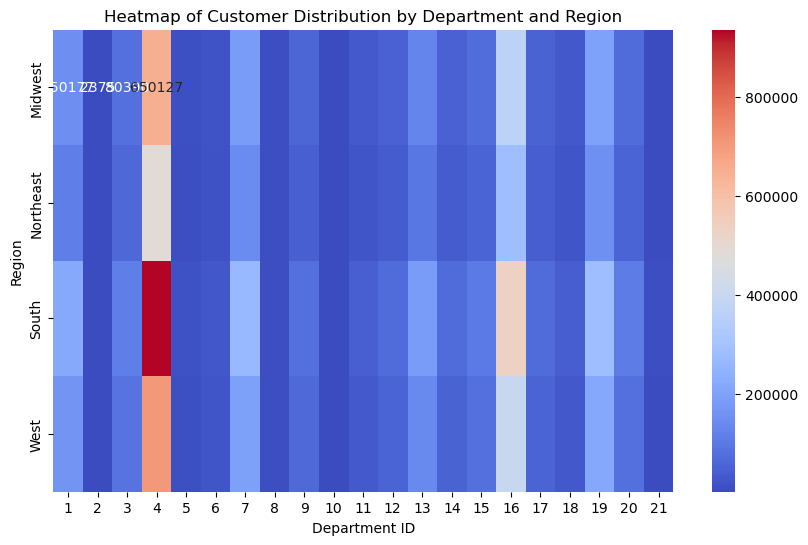

In [67]:
# Grouping by department_id, Region, and customer_id
grouped_data = orders_product_all_ex.groupby(['department_id', 'Region', 'customer_profile']).size().reset_index(name='count')

# Creating a pivot table for visualization
pivot_table = grouped_data.pivot_table(index='Region', columns='department_id', values='count', aggfunc='sum')

# Plotting the heatmap


plt.figure(figsize=(10, 6))
heat_customer_department=sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='g')
plt.xlabel('Department ID')
plt.ylabel('Region')
plt.title('Heatmap of Customer Distribution by Department and Region')
plt.show()

In [68]:
#Exporting Bar chart
heat_customer_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'heat_customer_department.png'))

In [69]:
# Export data to pkl

orders_product_all_ex.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_product_finall.pkl'))